# Марко Стефанов 0MI0200044

# Увод

Целта на този проект е да се направи статистически анализ на мачовете от Висшата лига на Англия, като се използват данни от сезоните в периода 2010-2020. Основната задача е да се провери дали има статистически значима разлика между някои ключови показатели при домакинствата (мачовете, в които отборите играят на свой терен) и гостуванията, както и между двете полувремена. Също така, ще покажем ключовото значение на ефективността на отборите в нападение и ефикасността им в защита, за техния успех. Данните, които съм използвал са от https://github.com/tara-nguyen/english-premier-league-datasets-for-10-seasons?utm_source=chatgpt.com


In [1]:
import pandas as pd
df = pd.read_csv("epl-allseasons-matchstats.csv")

# t-тест за сравнение между домакински и гостуващи удари
След, като сме заредили данните, ще направим t-тест на Стюдънт, за да сравним средния брой удари на домакините и гостите, за да проверим дали разликата между тях е статистически значима и следователно стадиона, на който играят отборите има значение. Ще изградим следните хипотези:

   **H0:** Няма разлика в средния брой удари на домакините и гостите.

   **Ha:** Има разлика в средния брой удари на домакините и гостите.

In [4]:
from scipy.stats import ttest_ind
df_ttest = df[['HomeShots', 'AwayShots']].dropna()

t_stat, p_val = ttest_ind(df_ttest['HomeShots'], df_ttest['AwayShots'])

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: 24.04132913785648
P-Value: 3.7398178024770016e-123


 Тъй като p-value е изключително малко (>0.05), то можем да отхвърли **H0** и да приемем **Ha**, т.е. има статистическо значима разлика в броят удари на отборите в техните домакинства и гостувания, следователно можем да кажем, че играта пред домакинска публика има позитивно влияние върху отборите.

# Рангов критериий на Уилкоксън за разпределените на головете в първото и второто полувреме

С помощта на ранговия критерий на Уилкоксън ще сравним разпределенията на головете през първото и второто полувреме, за да се провери има ли съществена разлика между тях. Ще изградим следните хипотези:

   **H0:** Няма разлика в разпределенията на головете в първите и вторите полувремена.

   **Ha:** Има разлика в разпределенията на головете в първите и вторите полувремена.

In [4]:
from scipy.stats import wilcoxon
df_wilcoxontest = df[['HomeGoals', 'AwayGoals', "HomeGoalsHalftime", "AwayGoalsHalftime"]].dropna()
df_wilcoxontest["FullTimeGoals"] = df_wilcoxontest["HomeGoals"] + df_wilcoxontest["AwayGoals"]
df_wilcoxontest["FirstHalfGoals"] = df_wilcoxontest["HomeGoalsHalftime"] + df_wilcoxontest["AwayGoalsHalftime"]
df_wilcoxontest["SecondHalfGoals"] = df_wilcoxontest["FullTimeGoals"] - df_wilcoxontest["FirstHalfGoals"]

wilcoxon_stat, p_wilcoxon = wilcoxon(df_wilcoxontest["FirstHalfGoals"], df_wilcoxontest["SecondHalfGoals"])

print("P-Value:", p_wilcoxon)

P-Value: 3.919631814055635e-31


Отново p-value е изключително малко, следователно можем да отхвърлим **H0** и да приемем **Ha** ,т.е. има статистическо значима разлика между головете от първото и головете от второто полувреме.

# Хи-квадрат тест за мачове на Тотнъм срещу други лондонски отбори

Има известен дебат, дали относителния неуспех на лондонските отбори в последните години да спечелят титлата на Англия се дължи на големия брой градски дербита, които играят помежду си. Лондон е градът с най-много представители в първенството (7), като освен него единствено Манчестър, Ливърпул и Бирмингам са имали по два представителя в един сезон. За целта съм взел, един от лондонските отбори (Тотнъм Хотспър) и съм сравнил представянията му в градските дербита и извънградските мачове чрез Хи-квадрат теста. Ще изградим следната хипотеза:

   **H0:** Няма статистически значима разлика в представянето на Тотнъм в градските и извънградските мачове

   **Ha:** Има статистически значима разлика в представянето на Тотнъм в градските и извънградските мачове


In [8]:
from scipy.stats import chi2_contingency

london_teams = ["Arsenal","Chelsea","QPR","West Ham","Crystal Palace"]

spurs_matches = df[(df["HomeTeam"] == "Tottenham") | (df["AwayTeam"] == "Tottenham")]

def is_london_derby(row):
    if row["HomeTeam"] == "Tottenham" and row["AwayTeam"] in london_teams:
        return "Derby"
    elif row["AwayTeam"] == "Tottenham" and row["HomeTeam"] in london_teams:
        return "Derby"
    else:
        return "Non-Derby"

spurs_matches["MatchType"] = spurs_matches.apply(is_london_derby, axis = 1)

def spurs_result(row):
    if row['HomeTeam'] == 'Tottenham':
        if row['FullTime'] == "HomeWin":
            return 'Win'
        elif row['FullTime'] == "AwayWin":
            return 'Loss'
        else:
            return 'Draw'
    else:
        if row['FullTime'] == "AwayWin":
            return 'Win'
        elif row['FullTime'] == "HomeWin":
            return 'Loss'
        else:
            return 'Draw'

spurs_matches['SpursResult'] = spurs_matches.apply(spurs_result, axis=1)

contingency_table = pd.crosstab(spurs_matches["MatchType"], spurs_matches["SpursResult"])

chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2}")
print(f"P-Value: {p_value_chi}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 3.2850878571788327
P-Value: 0.19348719806158418
Degrees of Freedom: 2


C:\Users\m.stefanov\AppData\Local\Temp\ipykernel_8464\1929651801.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spurs_matches["MatchType"] = spurs_matches.apply(is_london_derby, axis = 1)
C:\Users\m.stefanov\AppData\Local\Temp\ipykernel_8464\1929651801.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spurs_matches['SpursResult'] = spurs_matches.apply(spurs_result, axis=1)


Тъй, като p-valueто на теста е относително голямо, то не можем да отхвърлим H0, следователно разликата в представянето на Тотнъм в лондонските дербита спрямо мачовете с отбори извън Лондон е статистически незначителна.

# Влиянито на ефективността на отборите в защита и нападение спрямо техните резултати.

Тъй като имаме достъп до броят изтрели, които един отбор отправя и допуска в мач, то ние можем да покажем как тяхното съотношение или ефективност влияе върху техните резултати. За целта ще си създадем два коефициента за всеки отбор играл повече от 2 сезона във Висшата лига за този период и ще използваме scatterplot за да визуализираме кофеициентите.

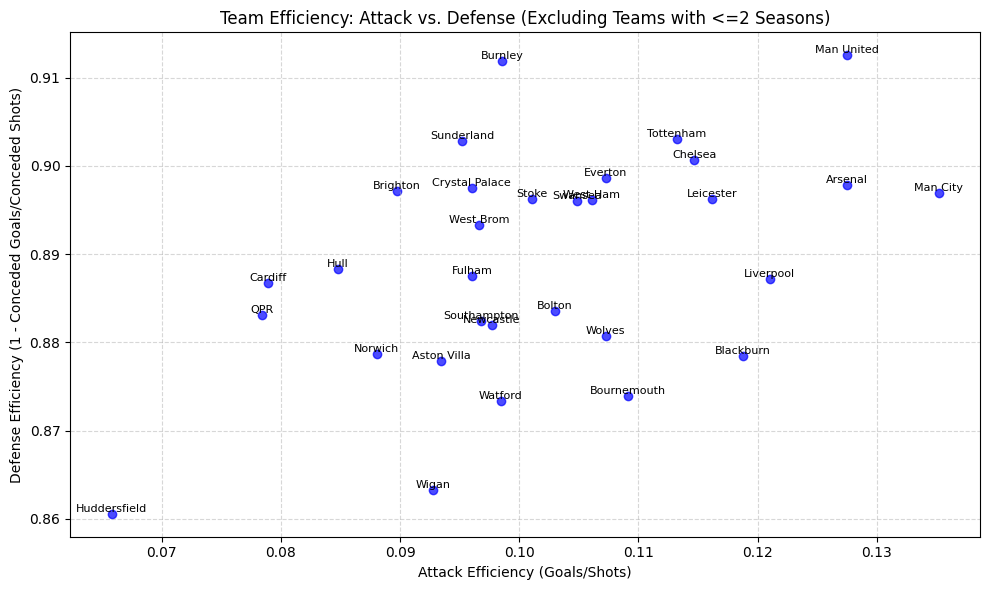

In [10]:
import matplotlib.pyplot as plt

home_seasons = df.groupby("HomeTeam")["Season"].nunique()
away_seasons = df.groupby("AwayTeam")["Season"].nunique()
total_seasons = (home_seasons + away_seasons).dropna()

eligible_teams = total_seasons[total_seasons >= 3].index

filtered_df = df[
    (df["HomeTeam"].isin(eligible_teams)) &
    (df["AwayTeam"].isin(eligible_teams))
]

home_attack = filtered_df.groupby("HomeTeam").agg({"HomeGoals": "sum", "HomeShots": "sum"})
away_attack = filtered_df.groupby("AwayTeam").agg({"AwayGoals": "sum", "AwayShots": "sum"})
attack_efficiency = (home_attack["HomeGoals"] + away_attack["AwayGoals"]) / (home_attack["HomeShots"] + away_attack["AwayShots"])

home_defense = filtered_df.groupby("HomeTeam").agg({"AwayGoals": "sum", "AwayShots": "sum"})
away_defense = filtered_df.groupby("AwayTeam").agg({"HomeGoals": "sum", "HomeShots": "sum"})
defense_efficiency = 1 - (home_defense["AwayGoals"] + away_defense["HomeGoals"]) / (home_defense["AwayShots"] + away_defense["HomeShots"])

efficiency_df = pd.DataFrame({
    "Attack Efficiency": attack_efficiency,
    "Defense Efficiency": defense_efficiency
}).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(
    efficiency_df["Attack Efficiency"],
    efficiency_df["Defense Efficiency"],
    alpha=0.7,
    color="blue"
)

for team in efficiency_df.index:
    plt.text(
        efficiency_df.loc[team, "Attack Efficiency"],
        efficiency_df.loc[team, "Defense Efficiency"],
        team,
        fontsize=8,
        ha="center",
        va="bottom"
    )

plt.xlabel("Attack Efficiency (Goals/Shots)")
plt.ylabel("Defense Efficiency (1 - Conceded Goals/Conceded Shots)")
plt.title("Team Efficiency: Attack vs. Defense (Excluding Teams with <=2 Seasons)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Можем да забележим, че отборите от "Голямата шестица" - Манчестър Юнайтед, Арсенал, Манчестър Сити, Ливърпул, Челси и Тотнъм гравитират към горния десен ъгъл на графиката или са сред отборите с най-добри показатели, както в нападение, така и в защита. Въпреки всичко, данните за техните резултати не фигурират и не можем да съпоставим резултатите им с тяхната ефективност

За целта, ще си направим два нови scatterplot-а, където ще съпоставим средния им брой точки (3 за победа, 1 за равенство и 0 за загубa) с техните коефициенти за ефективност в нападени и съответно в защита.

In [20]:
home_results = filtered_df.groupby("HomeTeam").agg({"FullTime": "count"})
away_results = filtered_df.groupby("AwayTeam").agg({"FullTime": "count"})

home_wins = filtered_df.groupby("HomeTeam").agg({"FullTime": lambda x: (x == "HomeWin").sum()})
home_draws = filtered_df.groupby("HomeTeam").agg({"FullTime": lambda x: (x == "Draw").sum()})
away_wins = filtered_df.groupby("AwayTeam").agg({"FullTime": lambda x: (x == "AwayWin").sum()})
away_draws = filtered_df.groupby("AwayTeam").agg({"FullTime": lambda x: (x == "Draw").sum()})

ppg = (3*(home_wins["FullTime"] + away_wins["FullTime"]) + home_draws["FullTime"] + away_draws["FullTime"])/(home_results['FullTime'] + away_results['FullTime'])
print(ppg)


HomeTeam
Arsenal           1.829730
Aston Villa       0.937984
Blackburn         0.958333
Bolton            1.111111
Bournemouth       1.112903
Brighton          1.035714
Burnley           1.161290
Cardiff           0.842105
Chelsea           1.918919
Crystal Palace    1.167939
Everton           1.443243
Fulham            1.048913
Huddersfield      0.697368
Hull              0.919643
Leicester         1.424107
Liverpool         1.902703
Man City          2.172973
Man United        1.929730
Newcastle         1.185629
Norwich           0.940860
QPR               0.803571
Southampton       1.258389
Stoke             1.192568
Sunderland        1.019380
Swansea           1.179389
Tottenham         1.840541
Watford           1.096774
West Brom         1.108108
West Ham          1.183735
Wigan             1.000000
Wolves            1.184932
Name: FullTime, dtype: float64


Сега вече като имаме данните за резултатите на отборите можем да представим гравично връзката между ефективността в нападение и техните резултати

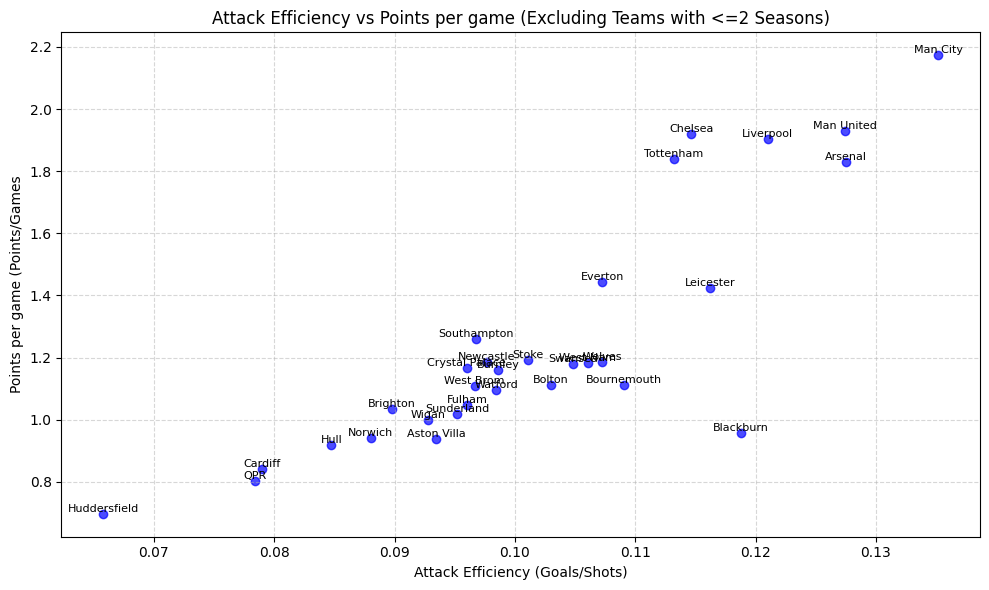

In [23]:
efficiency_df = pd.DataFrame({
    "Points per game": ppg,
    "Attack Efficiency": attack_efficiency
}).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(
    efficiency_df["Attack Efficiency"],
    efficiency_df["Points per game"],
    alpha=0.7,
    color="blue"
)

for team in efficiency_df.index:
    plt.text(
        efficiency_df.loc[team, "Attack Efficiency"],
        efficiency_df.loc[team, "Points per game"],
        team,
        fontsize=8,
        ha="center",
        va="bottom"
    )

plt.xlabel("Attack Efficiency (Goals/Shots)")
plt.ylabel("Points per game (Points/Games")
plt.title("Attack Efficiency vs Points per game (Excluding Teams with <=2 Seasons)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

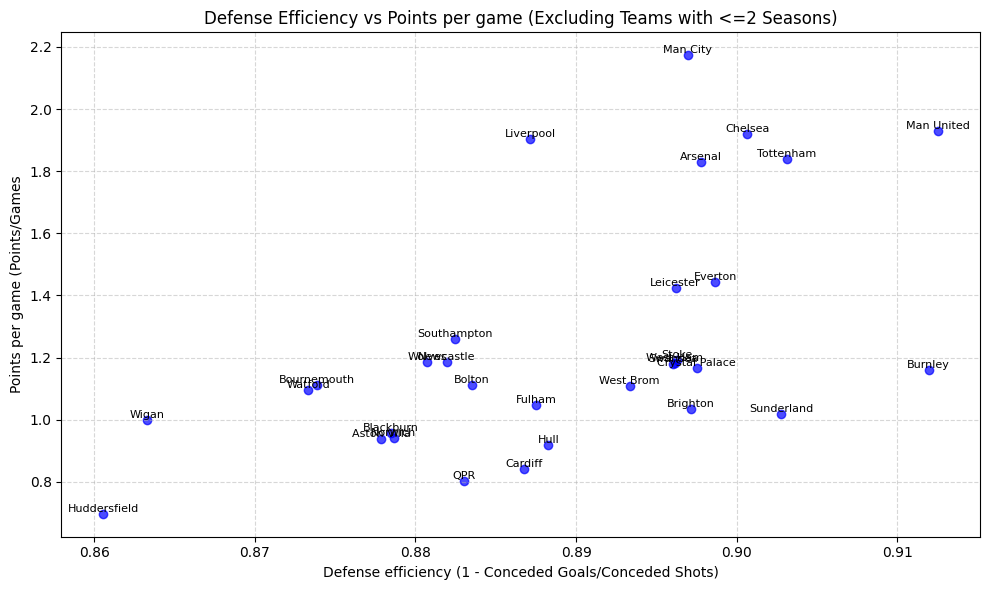

In [24]:
efficiency_df = pd.DataFrame({
    "Points per game": ppg,
    "Defense Efficiency": defense_efficiency
}).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(
    efficiency_df["Defense Efficiency"],
    efficiency_df["Points per game"],
    alpha=0.7,
    color="blue"
)

for team in efficiency_df.index:
    plt.text(
        efficiency_df.loc[team, "Defense Efficiency"],
        efficiency_df.loc[team, "Points per game"],
        team,
        fontsize=8,
        ha="center",
        va="bottom"
    )

plt.xlabel("Defense efficiency (1 - Conceded Goals/Conceded Shots)")
plt.ylabel("Points per game (Points/Games")
plt.title("Defense Efficiency vs Points per game (Excluding Teams with <=2 Seasons)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Както можем да забележим, нападателната ефективност доста по-корелирана с резултатите на един отбор